# INFLATION AND FERTILITY (MANGLER TEKST TIL FERTILITET)
### Motivation
This dataproject show how fertility and inflation have changed over time, understanding this dynamic can be crucial to understand the underlying trends and policies that have affected the economy over time.

Inflation rates, can be interpreted as the health of the economy wheras a high inflation can indicate economic instability, affecting everything from consumer purchasing power to investments in the economy. Conversely, low inflation present the economic predictability and the potential growth rate. By tracking inflation trends, policymakers can assess the effectiveness of the monetary policy and adjust it like wise.

Fertility rates, which measure the  number of children born per woman, offer essential insights into demographic shifts and social impact. Changes in fertility rates can potential influence population growth, age distribution, and workforce dynamics. Where low fertility rates,  can lead to an aging population, affecting pension systems and the social system. We assume that policymakers rely on fertility data to plan the needs in the economy.

In conclusion, by examining inflation and fertility trends over time, we gain a  understanding of economic resilience, demographic shifts, and the interconnectedness of economic and social policies. Whoch can be used by a policy maker to enhance policy which raises the growth rates and ensures a sustainaible welfare of the economy.

### The setup
For this project we use Statistiskbanken to get a comprehensive overview of the avaliable data of the danish economy. where we look at: CPI, GDP and Fertility Rate
- The Consumer Price Indes is used as a proxy for the inflation and represents the average change over time in prices paid by consumers for a variety of goods and services, reflecting inflationary pressures in the economy. 

- The GDP represents the total monetary value of all goods and services produced within Denmarks borders over a specific period, serving as a measure of economic output and growth. 

- The fertility rate represents the average number of children born per woman, providing insights into population growth and demographic trends.

Not this study does not look at the causality, due to the fact we do apply regression analysis and hypothesis testing and is a descriptive study.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Notes: 

We do not use the dataproject.py as we feel the datasorting and merging is essential to understand this dataproject and displays our thought process in this assignment.

For the "FOD33" we have retrieved the data through excel and inserted into our dataproject we do this, hence the Api only registers "TID" and "ALDER" as variables but not the fertility, this variable is essential thus it is retrieved "manually".


Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# for the excel data
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/bog1.xlsx')


# Print everything in data
os.listdir('data/')

['.DS_Store', 'BOG1.xlsx', 'ferrrr.xlsx', '~$BOG1.xlsx']

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [2]:
fert = DstApi('FERT1')
gdp = DstApi('NAN1')
fpi = DstApi ('PRIS112')

We have found our desired variables now it is time to clean the data

In [3]:
tabsum_fert= fert.tablesummary(language='en')
display(tabsum_fert)


Table FERT1: Total fertility rate (ages 15-49) by ancestry and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HERKOMST,6,AK,All women,DKK,Women of Danish origin,False
1,Tid,38,1986,1986,2023,2023,True


In [4]:
# The available values for a each variable: 
for variable in tabsum_fert['variable name']:
    print(variable+':')
    display(fert.variable_levels(variable, language='en'))

HERKOMST:


,id,text
0,AK,All women
1,IKV,Immigrant women from western countries
2,IKIV,Immigrant women from non-western countries
3,EKV,Descendant women from western countries
4,EKIV,Descendant women from non-western countries
5,DKK,Women of Danish origin


Tid:


,id,text
0,1986,1986
1,1987,1987
2,1988,1988
3,1989,1989
4,1990,1990
5,1991,1991
6,1992,1992
7,1993,1993
8,1994,1994
9,1995,1995


In [5]:
tabsum_gdp= gdp.tablesummary(language='en')
display(tabsum_gdp)
for var in tabsum_gdp['variable name']:
    print(var+':')
    display(gdp.variable_levels(var, language='en'))


Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-06-28T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2020-prices, chained values, (1000...",False
2,Tid,58,1966,1966,2023,2023,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2020-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2020-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


In [6]:
tabsum_fpi= fpi.tablesummary(language='en')
display(tabsum_fpi)
for var in tabsum_fpi['variable name']:
    print(var+':')
    display(fpi.variable_levels(var, language='en'))


Table PRIS112: Consumer price index by main figures and time
Last update: 2024-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HOVED,2,1005,"Average, yearly",1010,Annual increase,False
1,Tid,44,1980,1980,2023,2023,True


HOVED:


,id,text
0,1005,"Average, yearly"
1,1010,Annual increase


Tid:


,id,text
0,1980,1980
1,1981,1981
2,1982,1982
3,1983,1983
4,1984,1984
5,1985,1985
6,1986,1986
7,1987,1987
8,1988,1988
9,1989,1989


Now we have a quick overview of the avaible datapoints

In [7]:
params = fert.define_base_params(language='en')
params

{'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [8]:
params ={'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['AK']},
  {'code': 'Tid', 'values': ['>1994<=2023']}]}

In [9]:
fert_api = fert.get_data(params=params)
fert_api.head(15)

,HERKOMST,TID,INDHOLD
0,All women,1995,1809.7
1,All women,1996,1753.5
2,All women,1997,1756.2
3,All women,1998,1725.2
4,All women,1999,1738.3
5,All women,2000,1774.2
6,All women,2001,1745.0
7,All women,2002,1724.9
8,All women,2003,1759.9
9,All women,2004,1785.2


In [10]:
params = gdp.define_base_params(language='en')
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [11]:
params ={'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['B1GQK']},
  {'code': 'PRISENHED', 'values': ['V_M']},
  {'code': 'Tid', 'values': ['>1994<=2023']}]}

In [12]:
gdp_api = gdp.get_data(params=params)
gdp_api.head(15)

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1995,1035.6
1,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1996,1087.1
2,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1997,1144.2
3,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1998,1185.2
4,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1999,1241.0
5,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2000,1326.0
6,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2001,1372.3
7,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2002,1411.5
8,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2003,1438.9
9,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2004,1509.7


In [13]:
params = fpi.define_base_params(language='en')
params

{'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [14]:
params = {'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['1005']},
  {'code': 'Tid', 'values': ['>1994<=2023']}]}

In [15]:
fpi_api = fpi.get_data(params=params)
fpi_api.head(15)

,HOVED,TID,INDHOLD
0,"Average, yearly",1995,68.0
1,"Average, yearly",1996,69.5
2,"Average, yearly",1997,71.0
3,"Average, yearly",1998,72.3
4,"Average, yearly",1999,74.1
5,"Average, yearly",2000,76.2
6,"Average, yearly",2001,78.0
7,"Average, yearly",2002,79.9
8,"Average, yearly",2003,81.6
9,"Average, yearly",2004,82.5


We have now found the desired data where we want to merge it into one dataset.

The excel datasheet is extracted:

In [16]:
filename = 'data/BOG1.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(10)

,Fertilitetskvotienter efter alder og tid,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Enhed: Pr. 1.000 kvinder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1973.00,1974.00,1975.00,1976.00,1977.00,1978.00,1979.00,1980.00,1981.00,...,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022.00,2023.00
2,15-19,19.30,18.88,19.70,16.80,15.98,14.48,12.94,11.98,9.94,...,2.40,2.28,2.52,1.84,1.60,1.30,1.12,0.90,0.72,0.78
3,20-24,121.72,123.82,127.66,112.58,107.36,105.08,99.28,93.54,84.36,...,29.08,29.02,29.80,28.90,26.08,23.56,20.48,18.98,17.08,15.40
4,25-29,142.26,139.74,142.84,131.64,125.76,130.00,125.04,121.82,114.60,...,102.14,102.66,107.44,104.20,101.36,99.56,97.12,97.68,86.82,81.52
5,30-34,70.84,68.94,68.38,63.36,60.54,61.94,61.14,60.64,58.40,...,126.40,130.00,133.20,131.94,131.90,130.76,130.62,135.60,123.10,120.40
6,35-39,23.98,23.08,20.92,20.84,18.70,18.84,18.50,17.94,17.12,...,63.70,64.06,68.78,67.16,67.96,67.94,68.54,73.30,65.44,63.66
7,40-44,4.94,4.66,4.08,4.04,3.42,3.20,3.28,3.22,2.82,...,13.86,13.90,14.54,15.44,16.04,15.68,15.96,17.08,16.00,15.98
8,45-49,0.32,0.24,0.18,0.18,0.16,0.14,0.14,0.16,0.20,...,0.72,0.74,0.86,0.94,0.96,1.14,1.12,1.28,1.38,1.42


In [17]:
fertAlt = pd.read_excel(filename, skiprows=2)
fertAlt.drop(columns=[str(i) for i in range(1973, 1994)], inplace=True)
fertAlt.rename(columns = {'Unnamed: 0':'Age group'}, inplace=True)

In [18]:
col_dict = {}
for i in range(1994, 2023+1): # range goes from 2010 to 2023
    col_dict[str(i)] = f'fertAlt{i}'

col_dict = {str(i) : f'fertAlt{i}' for i in range(1991,2023+1)}
col_dict

{'1991': 'fertAlt1991',
 '1992': 'fertAlt1992',
 '1993': 'fertAlt1993',
 '1994': 'fertAlt1994',
 '1995': 'fertAlt1995',
 '1996': 'fertAlt1996',
 '1997': 'fertAlt1997',
 '1998': 'fertAlt1998',
 '1999': 'fertAlt1999',
 '2000': 'fertAlt2000',
 '2001': 'fertAlt2001',
 '2002': 'fertAlt2002',
 '2003': 'fertAlt2003',
 '2004': 'fertAlt2004',
 '2005': 'fertAlt2005',
 '2006': 'fertAlt2006',
 '2007': 'fertAlt2007',
 '2008': 'fertAlt2008',
 '2009': 'fertAlt2009',
 '2010': 'fertAlt2010',
 '2011': 'fertAlt2011',
 '2012': 'fertAlt2012',
 '2013': 'fertAlt2013',
 '2014': 'fertAlt2014',
 '2015': 'fertAlt2015',
 '2016': 'fertAlt2016',
 '2017': 'fertAlt2017',
 '2018': 'fertAlt2018',
 '2019': 'fertAlt2019',
 '2020': 'fertAlt2020',
 '2021': 'fertAlt2021',
 '2022': 'fertAlt2022',
 '2023': 'fertAlt2023'}

In [19]:
fertAlt.rename(columns = col_dict, inplace=True)
fertAlt.head(7)

,Age group,fertAlt1994,fertAlt1995,fertAlt1996,fertAlt1997,fertAlt1998,fertAlt1999,fertAlt2000,fertAlt2001,fertAlt2002,...,fertAlt2014,fertAlt2015,fertAlt2016,fertAlt2017,fertAlt2018,fertAlt2019,fertAlt2020,fertAlt2021,fertAlt2022,fertAlt2023
0,15-19,6.32,5.86,5.52,5.86,5.46,5.42,5.58,5.30,4.42,...,2.40,2.28,2.52,1.84,1.60,1.30,1.12,0.90,0.72,0.78
1,20-24,55.42,54.34,52.78,49.48,47.96,46.92,45.94,45.44,42.20,...,29.08,29.02,29.80,28.90,26.08,23.56,20.48,18.98,17.08,15.40
2,25-29,137.22,135.14,128.54,127.08,121.78,120.52,122.02,119.34,116.06,...,102.14,102.66,107.44,104.20,101.36,99.56,97.12,97.68,86.82,81.52
3,30-34,113.86,115.50,112.84,115.52,116.10,118.50,123.52,121.08,122.08,...,126.40,130.00,133.20,131.94,131.90,130.76,130.62,135.60,123.10,120.40
4,35-39,42.18,44.10,43.60,45.64,45.96,48.26,49.02,48.94,50.76,...,63.70,64.06,68.78,67.16,67.96,67.94,68.54,73.30,65.44,63.66
5,40-44,6.54,6.80,7.20,7.42,7.52,7.78,8.44,8.60,9.08,...,13.86,13.90,14.54,15.44,16.04,15.68,15.96,17.08,16.00,15.98
6,45-49,0.26,0.20,0.28,0.30,0.34,0.26,0.28,0.32,0.36,...,0.72,0.74,0.86,0.94,0.96,1.14,1.12,1.28,1.38,1.42


Here we apply data cleaning so it can read the data.

## Merging

We want to merge our three data sets into one to draw a graph.

In [20]:
# Merge fpi_api and fert_api on 'TID'
merged_first = pd.merge(fpi_api, fert_api, on='TID', how='inner')


In [21]:
# Now merge the result with gdp_api on 'TID'
final_merged = pd.merge(merged_first, gdp_api, on='TID', how='inner')


In [22]:
merged_first.rename(columns={
    'INDHOLD_x': 'FertilityRate',
    'INDHOLD_y': 'ConsumerPriceIndex'
}, inplace=True)

# Assuming gdp_api has been loaded and contains a column that should be renamed to 'GrossDomesticProduct'
gdp_api.rename(columns={
    'INDHOLD': 'GrossDomesticProduct'
}, inplace=True)

# Merge the result with gdp_api on 'TID'
final_merged = pd.merge(merged_first, gdp_api, on='TID', how='inner')

# Select only the desired columns
final_selected = final_merged[['TID', 'FertilityRate', 'ConsumerPriceIndex', 'GrossDomesticProduct']]

print(final_selected)



     TID FertilityRate ConsumerPriceIndex GrossDomesticProduct
0   1995          68.0             1809.7               1035.6
1   1996          69.5             1753.5               1087.1
2   1997          71.0             1756.2               1144.2
3   1998          72.3             1725.2               1185.2
4   1999          74.1             1738.3               1241.0
5   2000          76.2             1774.2               1326.0
6   2001          78.0             1745.0               1372.3
7   2002          79.9             1724.9               1411.5
8   2003          81.6             1759.9               1438.9
9   2004          82.5             1785.2               1509.7
10  2005          84.0             1802.1               1590.1
11  2006          85.6             1847.6               1685.2
12  2007          87.1             1843.5               1743.1
13  2008          90.1             1888.8               1809.7
14  2009          91.2             1839.6              

In [23]:
# Convert columns to numeric, handling non-convertible values
final_selected.loc[:, 'FertilityRate'] = pd.to_numeric(final_selected['FertilityRate'], errors='coerce')
final_selected.loc[:, 'ConsumerPriceIndex'] = pd.to_numeric(final_selected['ConsumerPriceIndex'], errors='coerce')
final_selected.loc[:, 'GrossDomesticProduct'] = pd.to_numeric(final_selected['GrossDomesticProduct'], errors='coerce')

# Calculate year-over-year percentage changes
final_selected.loc[:, 'FertilityRate_Pct_Change'] = final_selected['FertilityRate'].pct_change() * 100
final_selected.loc[:, 'ConsumerPriceIndex_Pct_Change'] = final_selected['ConsumerPriceIndex'].pct_change() * 100
final_selected.loc[:, 'GrossDomesticProduct_Pct_Change'] = final_selected['GrossDomesticProduct'].pct_change() * 100


/var/folders/s4/t_g3d19d071dl_561zffrd9c0000gn/T/ipykernel_62301/2465816959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_selected.loc[:, 'FertilityRate_Pct_Change'] = final_selected['FertilityRate'].pct_change() * 100
/var/folders/s4/t_g3d19d071dl_561zffrd9c0000gn/T/ipykernel_62301/2465816959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_selected.loc[:, 'ConsumerPriceIndex_Pct_Change'] = final_selected['ConsumerPriceIndex'].pct_change() * 100
/var/folders/s4/t_g3d19d071dl_561zffrd9c

## Drawing the Graphs

We draw histograms 

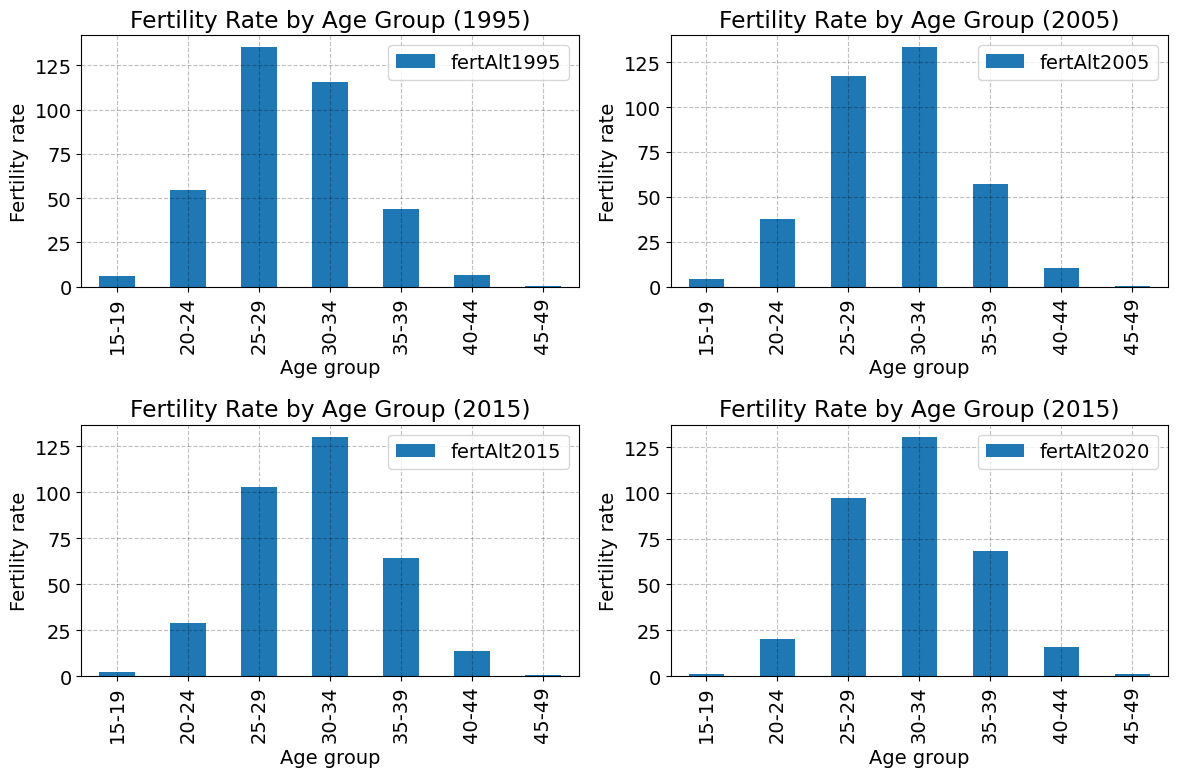

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fertAlt[['Age group', 'fertAlt1995']].plot(x='Age group', y='fertAlt1995', kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Age group')
axes[0, 0].set_ylabel('Fertility rate')
axes[0, 0].set_title('Fertility Rate by Age Group (1995)')

fertAlt[['Age group', 'fertAlt2005']].plot(x='Age group', y='fertAlt2005', kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Age group')
axes[0, 1].set_ylabel('Fertility rate')
axes[0, 1].set_title('Fertility Rate by Age Group (2005)')

fertAlt[['Age group', 'fertAlt2015']].plot(x='Age group', y='fertAlt2015', kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Age group')
axes[1, 0].set_ylabel('Fertility rate')
axes[1, 0].set_title('Fertility Rate by Age Group (2015)')

fertAlt[['Age group', 'fertAlt2020']].plot(x='Age group', y='fertAlt2020', kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Age group')
axes[1, 1].set_ylabel('Fertility rate')
axes[1, 1].set_title('Fertility Rate by Age Group (2015)')

plt.tight_layout()
plt.show()

We print the actual values in a table and more importantly draw the graph

In [25]:
pct_change_df = final_selected[['TID', 'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]
pct_change_df = pct_change_df.iloc[1:].reset_index(drop=True)


print("Year-Over-Year Percentage Changes (Preview):")
print(pct_change_df.head(40).to_string(index=False))

Year-Over-Year Percentage Changes (Preview):
 TID  FertilityRate_Pct_Change  ConsumerPriceIndex_Pct_Change  GrossDomesticProduct_Pct_Change
1996                  2.205882                      -3.105487                         4.972963
1997                  2.158273                       0.153978                         5.252507
1998                  1.830986                      -1.765175                         3.583290
1999                  2.489627                       0.759332                         4.708066
2000                  2.834008                       2.065236                         6.849315
2001                  2.362205                      -1.645812                         3.491704
2002                  2.435897                      -1.151862                         2.856518
2003                  2.127660                       2.029103                         1.941197
2004                  1.102941                       1.437582                         4.920425
2005 

In [26]:
# Create an interactive line plot with Plotly
fig = px.line(final_selected, x='TID', y=[
    'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change'],
    labels={
        'value': 'Percentage Change (%)',
        'variable': 'Metrics',
        'TID': 'Year'
    },
    title='Year-over-Year Percentage Change'
)

# Update layout for clearer display
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Percentage Change',
    legend_title='Metric'
)

# Show the plot
fig.show()




If our interactive graph cant load, we have also created a simple sketch using matplot package, by removing the "#" but we advise to use the interactive figure, as you can isolate each metric 

# Ordinary Leasy squares

Finally we run an OLS on fertility rate and the consumer price index and the GD to see how they affect eachother

In [27]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Sample dataset creation for demonstration
# pct_change_df = final_selected[['TID', 'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]
# pct_change_df = pct_change_df.iloc[1:].reset_index(drop=True)

# Define the dependent variable 'y' and independent variables 'X'
y = pct_change_df['FertilityRate_Pct_Change']
X = pct_change_df[['ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     FertilityRate_Pct_Change   R-squared:                       0.534
Model:                                  OLS   Adj. R-squared:                  0.497
Method:                       Least Squares   F-statistic:                     14.35
Date:                      Thu, 22 Aug 2024   Prob (F-statistic):           7.07e-05
Time:                              18:50:31   Log-Likelihood:                -38.449
No. Observations:                        28   AIC:                             82.90
Df Residuals:                            25   BIC:                             86.89
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [28]:
#plt.figure(figsize=(10, 6))
#plt.plot(final_selected['TID'], final_selected['FertilityRate_Pct_Change'], label='Fertility Rate % Change', marker='o')
#plt.plot(final_selected['TID'], final_selected['ConsumerPriceIndex_Pct_Change'], label='Consumer Price Index % Change', marker='x')
#plt.plot(final_selected['TID'], final_selected['GrossDomesticProduct_Pct_Change'], label='Gross Domestic Product % Change', marker='^')
#plt.xlabel('Year')
#plt.ylabel('Percentage Change (%)')
#plt.title('Year-over-Year Percentage Change')
#plt.legend()
#plt.grid(True)

#plt.show()

## Analysis:

For this Data-project we have conducted a simple analysis of three variables from Statiskbanken, we have utilised a common tool from the descriptive economcis course where we look at the yearly percentage change in a variable, thus being able to compare the data to see how the varaibles changes within the analytic period.


#### What does the box diagram show?

We observe that is all four years we look at the age group 30-34 produces the most children,

#### What does the graph show?

The Gross Domestic Product reflects the economic output and growth over time.
- The Gross Domestic Product starts with an yearly increase on 5 pct. points. after adjusting to a 2.0 pct. points. in the period 2001-2003. from 2004 to 2008 we see a yearly increase on around 5.0 to 3.0 pct. points. where as in 2009 we see decrease on -4.4 pct. points. this is caused by the financial crisis. followed the next year 2010 with an increase on 4.8 pct points. Onwards we see an increase on around 2.0 pct. points. increase each year with the exception of 2016-2017 followed by a sharp decling in 2020 where it only increases with 0,5 pct. following by a boom in 2021-2022 where it increases with 9-11 pct.points. - Overall this draws a picture of a stable economy recovering from the financial crisis with a boom in 2021-2022.

The Consumer Price Index tracks changes in the cost of living and inflationary pressures.
- The Consumer Price Index change is more volatile. This is evident in the period 1995-1996 where it starts off with -3.1 pct. points. and bounces back on an increase on 0.15 pct. points. this volatiltiy describes the whole period up to 2010 where it bounces between a negative and positve value. It experiences a significant drop around 2011, a rise peaking in 2012, and then falls again sharply by 2023. The most notable point is the extreme dip in 2022, indicating a period of deflation or significant price decreases, followed by a recovery in 2023.
- Overall we can see that the covid crisis had a massive effect on the consumer prices during the crisis, while the financial crisis had effects after the crisis.

The Fertility Rate provides insights into demographic trends and societal responses.
- Fertility seems stable compared to the others, with fluctuations remaining within a narrower range. but with a steady decline wheras the first period from 1995-2003 we see an yearly increaseover 2.0 pct. points. whereas in 2004-2009 we only see an increase by 1 pct. point. with the exception of 2008 we see a fertility increase by 3.0 pct. points. in 2010-2013 we can see an increase by 2.0-3.0 pct. points. We observe around the years 2014-2015, after which it stabilizes and shows an upward trend starting around 2020, peaking in 2022. butexcluding the covid years it fluctuates between 3-1 yearly pct. change. 


- The stabilazation can be seen as a indicator stable policy changes and economic confidence, which can be interpreted as a society which trusts the government during crises while due to “post-crisis fiscal stimuli packages” or other growth-driving factors.

#### What does the OLS show?

We have set up a model which sees how fertility is affected by the GDP, and the Consumer Price Index. We find that the fertility is affected negativly by the Consumer Price index, the coefficient is -0.2389, indicating that for each 1% increase in the CPI percentage change, the fertility rate percentage change is expected to decrease by approximately 0.24%, holding GDP constant.

For the GDP the The coefficient is 0.2453, meaning that for each 1% increase in GDP percentage change, the fertility rate percentage change is expected to increase by approximately 0.25%, holding CPI constant

The p-values for both independent variables are 0.000, which indicates that these variables are statistically significant predictors of the fertility rate percentage.


## Conclusion on the graph: 
The data project of the  GDP, CPI, and Fertility Rate in Denmark reveals  relationships and dynamic interactions within the economy where the key take aways are

- __Economic adaptation__ The danish GDP show effective ecnomic adaptation in recovery phases following economic downturns, which can be interpretated as robust economic management by the policy makers.

- __Price stability__ The fluctutations of the Consumer Price Index shows how policy changes and externals shocks in the economy affects the sensitvity of the consumer prices

The result we wanted to find was that the relationship between CPI and Fertility would affect the cost of living. Where an increase in  Consumer Price Index, would indicate inflation, which raises the cost of living.  We know that If wages do not keep up with inflation, families may feel financially pressured and may decide to have fewer children. This didn’t happen due to the overall stable nature of the Danish Economy.


## Conclusion on the OLS

This OLS regression model suggests that there is a statistically significant relationship between the percentage changes in the Consumer Price Index and GDP with the percentage change in the fertility rate. With CPI having a negative impact and GDP having a positive impact on fertility rates. The model appears to be statistically valid with normally distributed residuals and significant predictors.

Which means that higher inflation or cost of living is associated with a decline in fertility rates. This suggests that when the cost of goods and services rises, people may feel financial pressure, leading them to have fewer children. Reversly Economic growth is associated with an increase in fertility rates seen through the GDP. This implies that when the economy is doing well, people may feel more financially secure and confident in their ability to support a larger family, leading to more children being born.


In [29]:
filename = 'data/ferrrr.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(10)
fertregression = pd.read_excel(filename, skiprows=0)
fertregression.head(10)


,Unnamed: 0,FERTILITY,GDP,CPI,15-19,20-24,25-29,30-34,35-39,40-44,45-49
0,1986,1481.9,710.0,52.8,6.54,66.52,121.06,74.92,23.30,3.86,0.20
1,1987,1497.7,746.8,54.9,6.68,63.30,122.02,78.40,25.06,3.92,0.18
2,1988,1561.8,777.8,57.4,6.46,62.62,127.80,84.20,27.00,4.14,0.20
3,1989,1621.2,821.0,60.1,6.58,62.98,130.44,90.04,29.34,4.68,0.18
4,1990,1669.6,855.4,61.7,6.44,62.90,133.18,94.66,31.52,4.98,0.24
5,1991,1684.4,890.3,63.2,6.34,60.56,133.42,96.86,34.18,5.44,0.16
6,1992,1764.8,923.3,64.5,6.74,59.92,137.56,106.44,36.32,5.70,0.30
7,1993,1751.2,927.9,65.3,6.26,56.82,134.68,107.34,38.52,6.42,0.22
8,1994,1809.1,992.4,66.6,6.32,55.42,137.22,113.86,42.18,6.54,0.26
9,1995,1809.7,1035.6,68.0,5.86,54.34,135.14,115.50,44.10,6.80,0.20


In [30]:

import statsmodels.api as sm
import pandas as pd
import numpy as np

# Sample dataset creation for demonstration
# pct_change_df = final_selected[['TID', 'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]
# pct_change_df = pct_change_df.iloc[1:].reset_index(drop=True)

# Define the dependent variable 'y' and independent variables 'X'
y = fertregression['40-44']
X = fertregression[['CPI', 'GDP']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  40-44   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     616.7
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           5.18e-28
Time:                        18:50:31   Log-Likelihood:                -38.737
No. Observations:                  38   AIC:                             83.47
Df Residuals:                      35   BIC:                             88.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7875      1.542     -4.403      0.0

In [31]:

import statsmodels.api as sm
import pandas as pd
import numpy as np

# Sample dataset creation for demonstration
# pct_change_df = final_selected[['TID', 'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]
# pct_change_df = pct_change_df.iloc[1:].reset_index(drop=True)

# Define the dependent variable 'y' and independent variables 'X'
y = fertregression['25-29']
X = fertregression[['CPI', 'GDP']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  25-29   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     118.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.56e-16
Time:                        18:50:31   Log-Likelihood:                -114.94
No. Observations:                  38   AIC:                             235.9
Df Residuals:                      35   BIC:                             240.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.2373     11.451     12.683      0.0